In [1]:
# 导入必要的包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False

In [2]:
# 加载数据集
iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)
print(iris.target)
print(iris.target_names)
print(iris.feature_names)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# 加载Iris数据集
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 映射目标名称
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

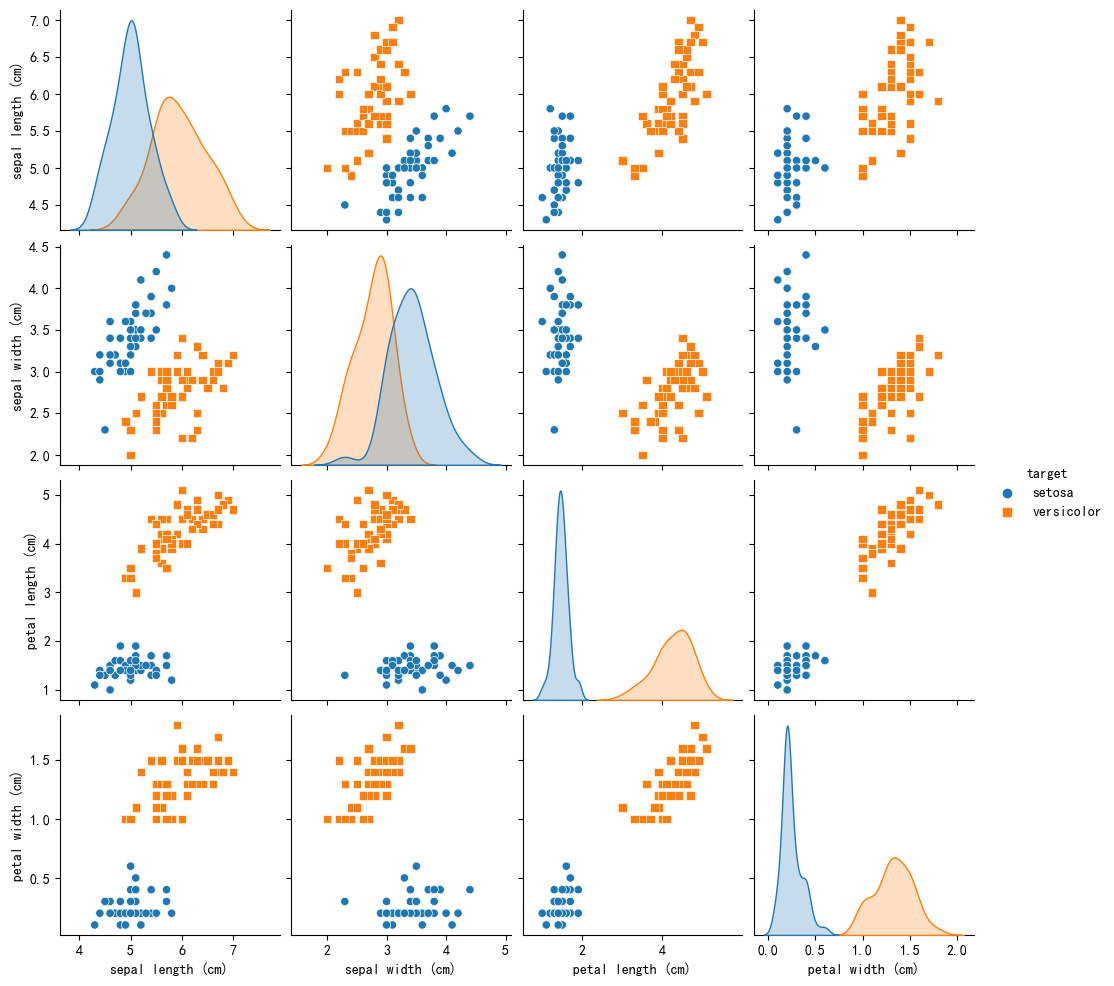

In [4]:
# 使用seaborn绘制所有特征对的散点图矩阵
df_filtered = df[df['target'].isin(['setosa', 'versicolor'])]

sns.pairplot(df_filtered, hue='target', markers=["o", "s"])
plt.show()

In [5]:
# 选择最优的两个特征: Petal Length 和 Petal Width
X = df_filtered[['petal length (cm)', 'petal width (cm)']].values
y = df_filtered['target'].map({'setosa': 0, 'versicolor': 1}).values

# 标准化特征
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [6]:
# 训练感知机模型
clf = Perceptron(tol=1e-3, random_state=2024)
clf.fit(X_train, y_train)

print("特征权重：",clf.coef_)
print("截距",clf.intercept_)
print("迭代次数",clf.n_iter_)

print(clf.score(X_test, y_test))

特征权重： [[1.59469445 1.42267699]]
截距 [0.]
迭代次数 6
1.0


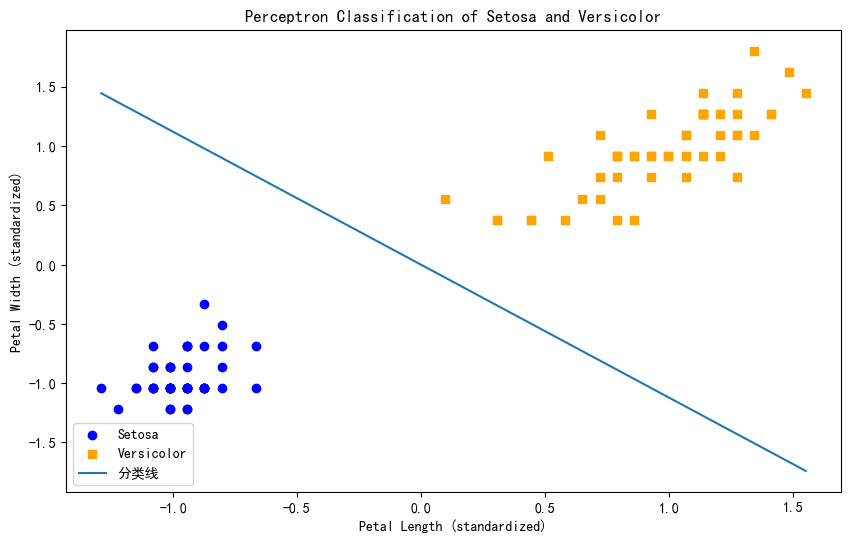

In [7]:
# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', marker='o', label='Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', marker='s', label='Versicolor')

# 绘制分类线
# 获取权重和偏置
w = clf.coef_[0]
b = clf.intercept_[0]
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(w[0] * x_values + b) / w[1]
plt.plot(x_values, y_values, label="分类线")

# 设置图例和标签
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.legend()
plt.title('Perceptron Classification of Setosa and Versicolor')
plt.show()